# Playground for testing out the data

## Importing Libraries

In [47]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from IPython.display import Audio
from IPython.display import display
from matplotlib import pyplot as plt

## Understanding the audio

In [136]:
def load_wav(path):
    """
    Opens a wav file and returns its data and sample rate as numpy arrays
    """
    file = tf.io.read_file(path)
    audio, sample_rate = tf.audio.decode_wav(contents=file)
    audio = tf.squeeze(audio)
    return tf.cast(audio, tf.float32).numpy(), tf.cast(sample_rate, tf.float32).numpy()

In [137]:
def to_spectrogram(audio, sample_rate, step=128):
    """
    Convert audio waveform to spectrogram
    """
    length = int(sample_rate) // step
    spectrogram = tf.signal.stft(audio, frame_length=length, frame_step=128)
    spectrogram = tf.abs(spectrogram) # extract magnitude
    return tf.cast(spectrogram, tf.float32).numpy()

def plot_spectrogram(spectrogram):
    """
    Modified from https://www.tensorflow.org/tutorials/audio/simple_audio
    """
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
    # Convert the frequencies to log scale and transpose, so that the time is
    # represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    
    fig, ax = plt.subplots(1, figsize=(12, 4))
    ax.pcolormesh(X, Y, log_spec, shading='auto')
    plt.title('Spectrogram')
    plt.show()

In [138]:
def checkout_audio(idx):
    """
    Make human sense of a particular audio
    """
    
    all_fpaths = os.listdir('audio')
    sample_fpath = "audio/" + all_fpaths[idx]
    print(all_fpaths[idx])

    audio, rate = load_wav(sample_fpath)
    print(f'Audio shape: {audio.shape}, sample rate: {rate}. Audio max: {audio.max()}, audio min: {audio.min()}.')

    display(Audio(audio, rate=rate))
    
    plt.plot(audio)
    plt.show()
    
    spectrogram = to_spectrogram(audio, rate)
    print(f'Spectrogram shape: {spectrogram.shape}')
    plot_spectrogram(spectrogram)

1-100032-A-0.wav
Audio shape: (220500,), sample rate: 44100.0. Audio max: 0.99884033203125, audio min: -0.9683837890625.


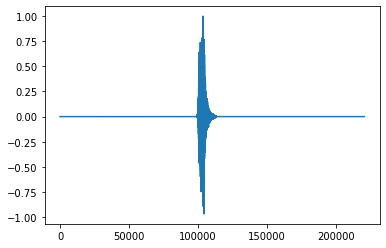

Spectrogram shape: (1720, 257)


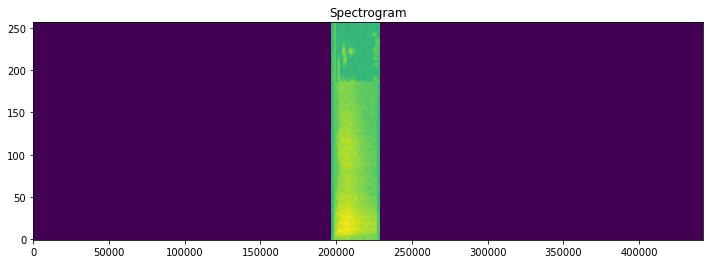

In [161]:
checkout_audio(0)

## Pre-Processing - applied to data

## Augmentations - applied to training data to increase dataset representation

np Input -> np Output

For Alex Yi:
- [x] no augmentation
- [x] add random noise
    - [ ] sin waves
- [x] speeding/slowing ('a little bit')
- [x] time shifting
    - if single-event in middle
        - [x] shift that around
    - else
        - [x] cyclic shifting for all
- [x] changing volume
- [x] pitch shift (shifting pitch 'a little bit')
- [x] random zeroing of frames
- [x] reverb

- [ ] HarmonicDistortion (if you're crazy) [look here](https://arxiv.org/ftp/arxiv/papers/1912/1912.07756.pdf)
- [ ] TF-Masking (randomly zeroing certain frequencies)

For Me:
- [ ] write input pipeline
- [ ] mix 2+ wavs together
- [ ] reflect

For Mark:
- [ ] find (good) 5s audio data of guns

In [ ]:
# Labelling scheme
bird: [0 1 0 0 0] (['humans', 'natural', 'noise', 'guns', 'chainsaw'])
plane: [1 0 0 0 0] (['humans', 'natural', 'noise', 'guns', 'chainsaw'])
+: [1 1 0 0 0] (['humans', 'natural', 'noise', 'guns', 'chainsaw'])